<a href="https://colab.research.google.com/github/marlcin2004-dev/Biomass_deterministic_modeling/blob/main/notebooks/bifurcation_Mod_Det.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Klonujemy repo
!git clone https://github.com/marlcin2004-dev/Biomass_deterministic_modeling.git
%cd Biomass_deterministic_modeling
import sys
sys.path.append("./pipeline")

Cloning into 'Biomass_deterministic_modeling'...
remote: Enumerating objects: 84, done.
remote: Counting objects: 100% (84/84), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 84 (delta 27), reused 44 (delta 9), pack-reused 0 (from 0)
Receiving objects: 100% (84/84), 1.14 MiB | 5.94 MiB/s, done.
Resolving deltas: 100% (27/27), done.
/content/Biomass_deterministic_modeling


Simulation for a descending...


100%|██████████| 300/300 [16:15<00:00,  3.25s/it]


Simulation for a increasing...


300it [06:59,  1.40s/it]


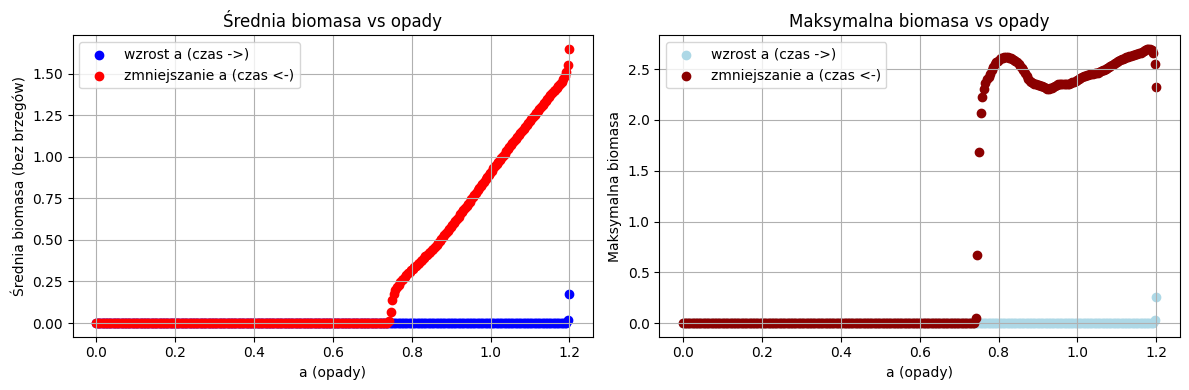

In [2]:
from bifurcation import BifurcationExperiment
from Klausmeier import KlausmeierModel
import numpy as np
import matplotlib.pyplot as plt

# PARAMETRY:

params = dict(
    d1=1,
    d2=0.05,
    m=0.45,
    Lx=10, Ly=10,
    Nx=40, Ny=40,
    ht=0.005,
    tol=1e-5,
    max_iter=1000,
    start_water=1.0,
    start_biomass=1.5,
    noise=0.05
)

a_up = np.linspace(0, 1.2, 300)
a_down = np.linspace(1.2, 0, 300)

avg_down, max_down, avg_up, max_up = BifurcationExperiment(a_down, params).run()

# Ploty

fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharex=True)

# --- WYKRES 1: ŚREDNIA BIOMASA ---
axes[0].scatter(a_up, avg_up, label="wzrost a (czas ->)", color="blue")
axes[0].scatter(a_up, avg_down[::-1], label="zmniejszanie a (czas <-)", color="red")
axes[0].set_xlabel("a (opady)")
axes[0].set_ylabel("Średnia biomasa (bez brzegów)")
axes[0].set_title("Średnia biomasa vs opady")
axes[0].legend()
axes[0].grid(True)

# --- WYKRES 2: MAKSYMALNA BIOMASA ---
axes[1].scatter(a_up, max_up, label="wzrost a (czas ->)", color="lightblue")
axes[1].scatter(a_up, max_down[::-1], label="zmniejszanie a (czas <-)", color="darkred")
axes[1].set_xlabel("a (opady)")
axes[1].set_ylabel("Maksymalna biomasa")
axes[1].set_title("Maksymalna biomasa vs opady")
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()